# 房价预测



# 一.数据预处理

## 1.  观察数据

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.core.dtypes.common import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

# 设置图片中文字符显示
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [2]:
data_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
 data_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [4]:
data_train.shape

(1460, 81)

## 2. 分析"特征与特征之间的关系"

 ### 绘制散点图

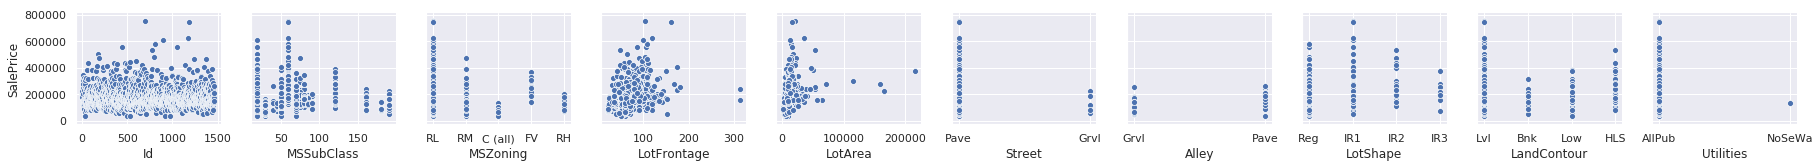

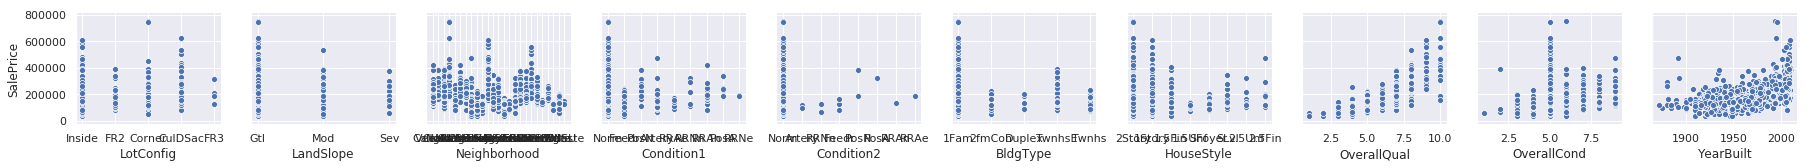

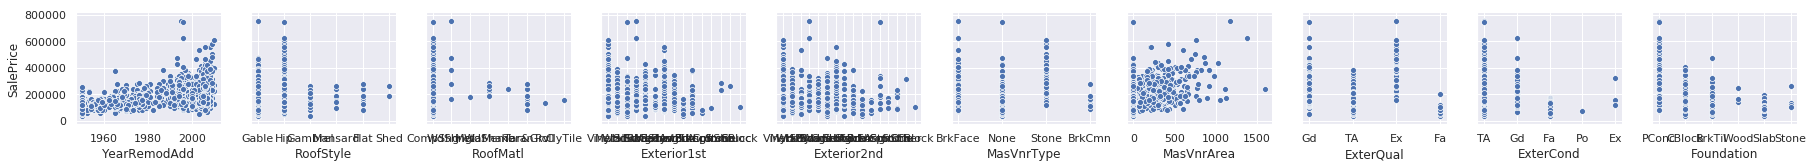

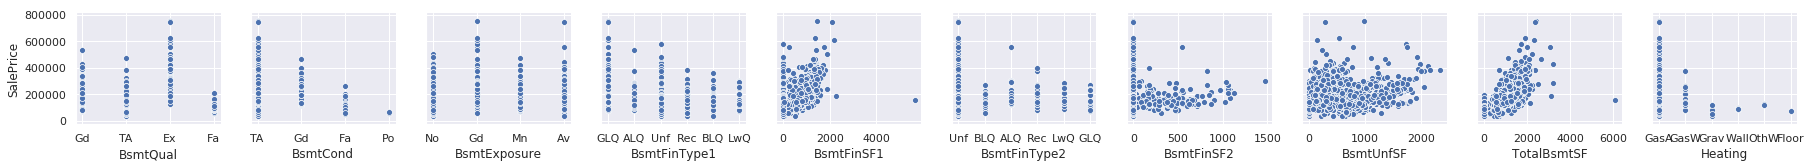

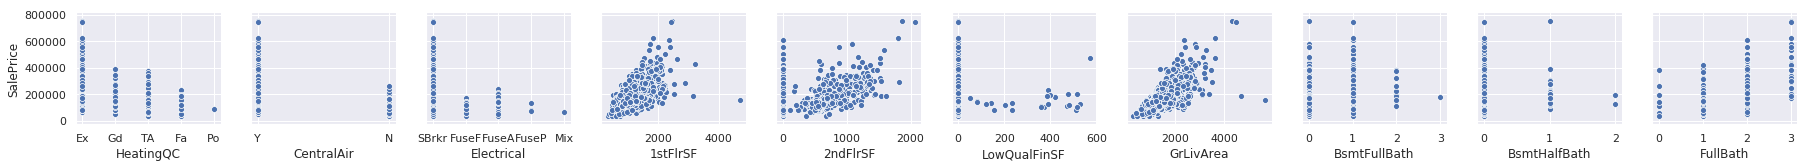

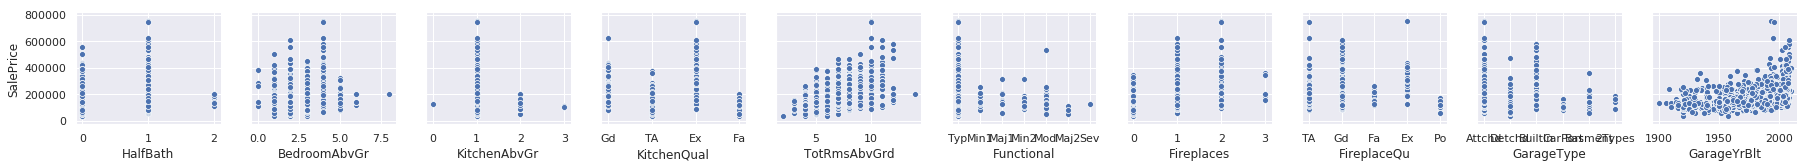

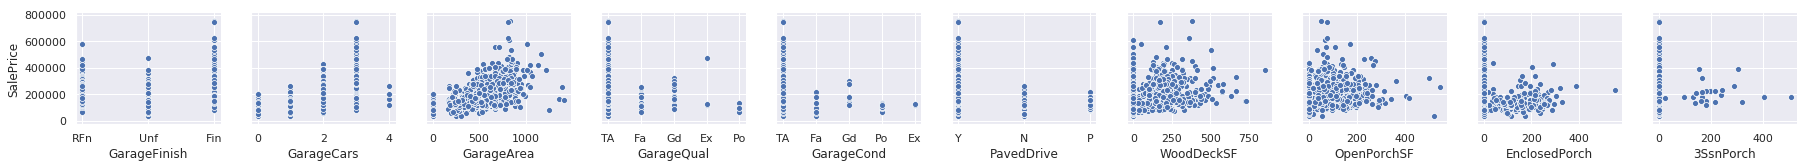

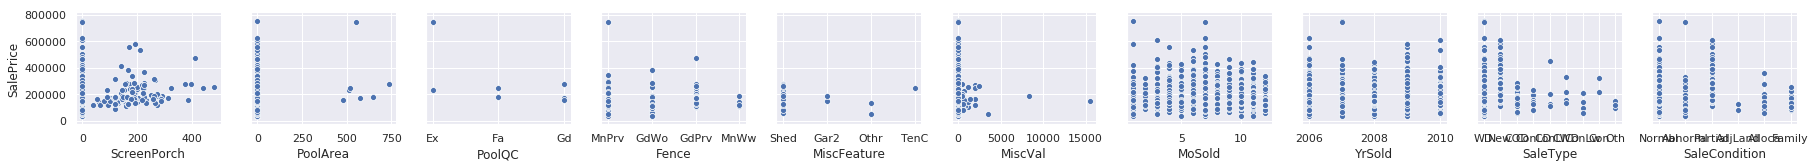

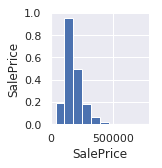

In [5]:
sns.set()

for i in range(9):
    sns.pairplot(data_train, x_vars=data_train.columns.values[10*i:10*(i+1)], y_vars="SalePrice")
plt.show()

 ###  绘制特征矩阵

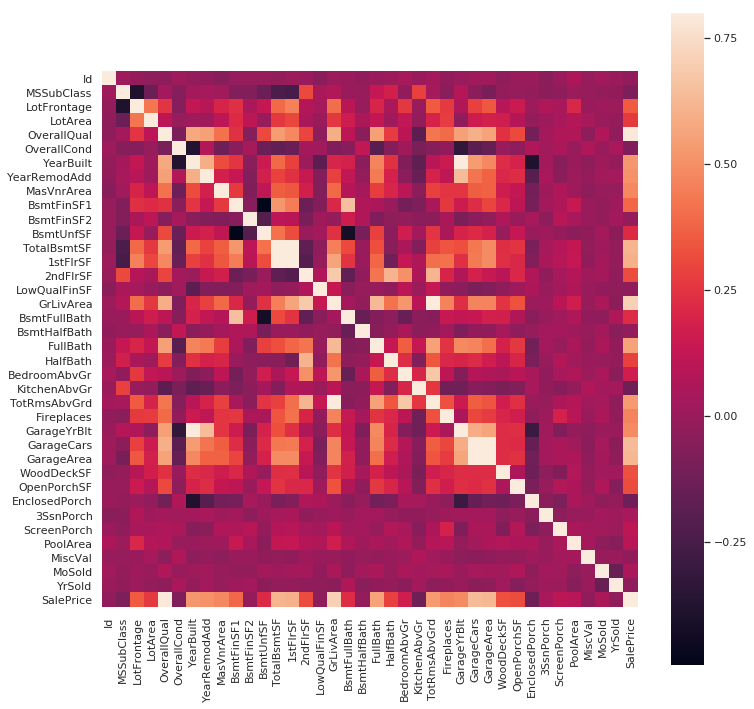

In [6]:
#correlation matrix
corrmat = data_train.corr()
corrmat.sort_values('SalePrice',ascending=False).index
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

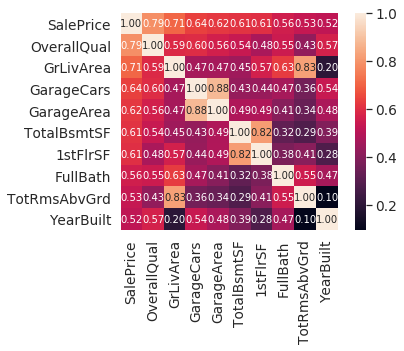

In [7]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# print(corrmat.sort_values('SalePrice',ascending=False).index)
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
print(corrmat.sort_values('SalePrice',ascending=False).index)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


 ### 重要特征分析与异常值处理

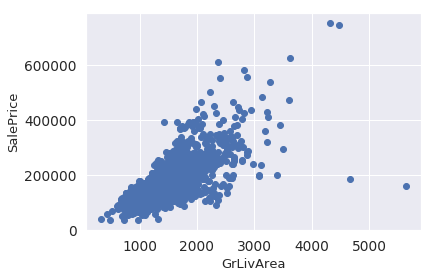

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['GrLivArea'], y = data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [10]:
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<300000)].index) # 删除异常值


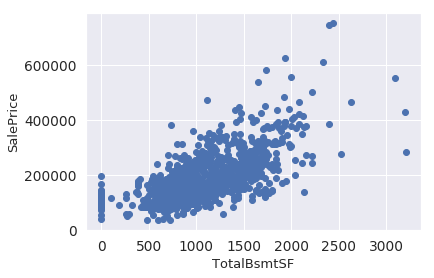

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['TotalBsmtSF'], y = data_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

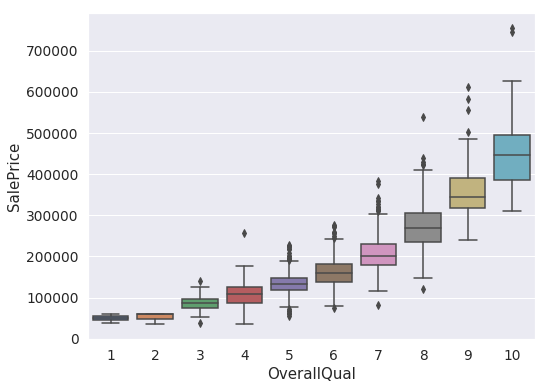

In [12]:
 # 数字型离散变量
data = pd.concat([data_train['SalePrice'], data_train["OverallQual"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
# fig.axis(ymin=0, ymax=800000);

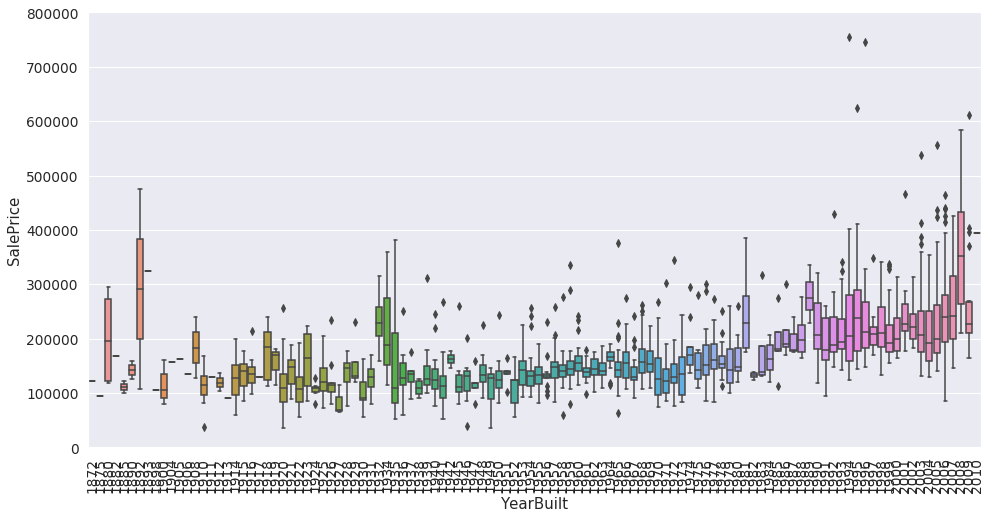

In [13]:
 # 数字型离散变量
data = pd.concat([data_train['SalePrice'], data_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## 3.分析预测值"SalePrice"的分布规律

In [14]:
 data_train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

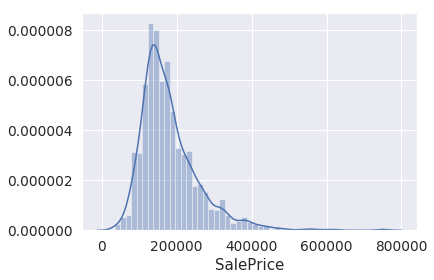

In [15]:
sns.distplot(data_train['SalePrice']);

In [16]:
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


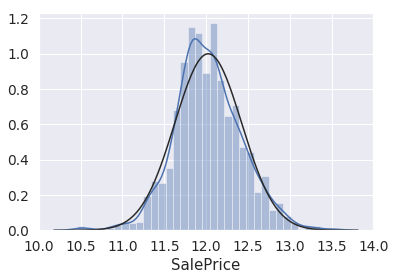

In [17]:
data_train["SalePrice"] = np.log1p(data_train["SalePrice"])
sns.distplot(data_train['SalePrice'],fit=norm );

## 4. 缺失值分析与处理

### 缺失值分析

In [18]:
ntrain = data_train.shape[0]
ntest = data_test.shape[0]
y_train = data_train.SalePrice.values
all_data = pd.concat((data_train, data_test)).reset_index(drop=True)
x_all = all_data.drop(['SalePrice',"Id"], axis=1, inplace=True) # 删除'SalePrice',"Id"属性  我
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


计算缺失值的个数和比例

In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()  # 这里只显示了5条

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151


Text(0.5, 1.0, 'Percent missing data by feature')

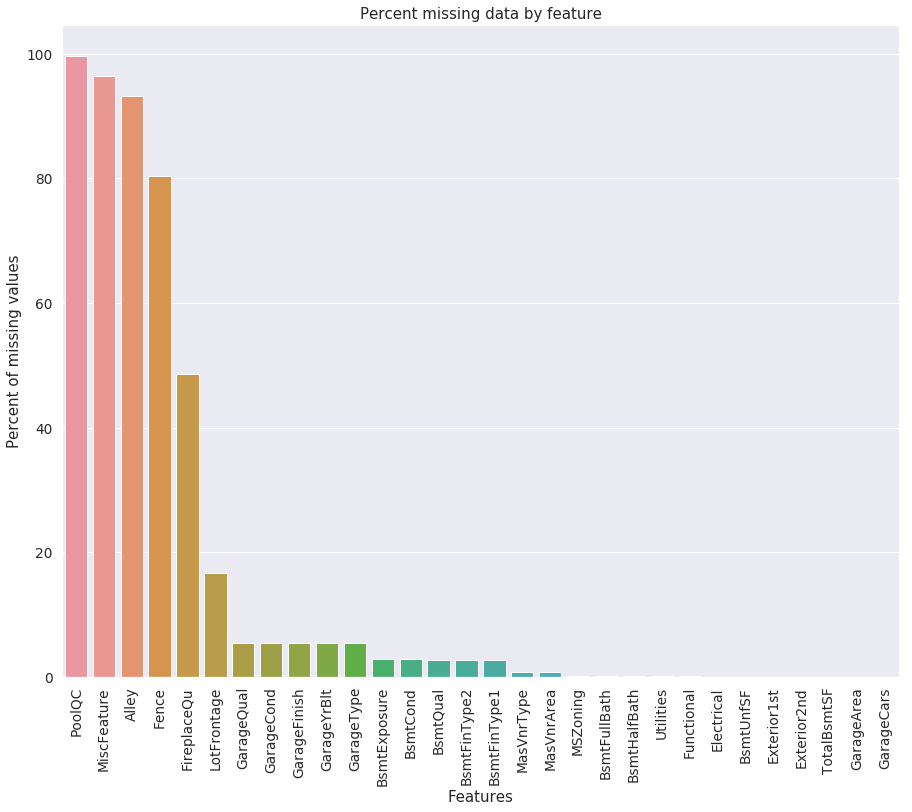

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### 缺失值处理

In [21]:
for i in ["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"]:
    all_data[i] = all_data[i].fillna("None")
print(all_data.shape)

(2917, 79)


In [22]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

对于接下来5个GarageX数据,填充None值

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt'):
    all_data[col] = all_data[col].fillna('None')

对于接下来5个Bsmt数据,填充None值

In [24]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

对于接下来两个MasVn,仍然填充none

In [25]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

对于损失极少的特征,可以使用众数填补

In [26]:
for col in ('MSZoning', 'Functional', 'Electrical', 'GarageCond','Exterior1st','Exterior2nd','SaleType',"KitchenQual" ):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    print(all_data[col].mode()[0])
print(all_data.shape)

RL
Typ
SBrkr
TA
VinylSd
VinylSd
WD
TA
(2917, 79)


仍然使用0填补

In [27]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

对于GarageArea和GarageCars使用0填补,代表没有Garage

In [28]:
for col in ( 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
print(all_data.shape)

(2917, 79)


删除Utilities列,因为他的值几乎一样,值几乎一样的列存在的意义不大

In [29]:
all_data = all_data.drop(['Utilities'], axis=1)
print(all_data.shape)

(2917, 78)


检查是否有缺失值

In [30]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### 5. 特征处理

In [31]:

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

 ### 添加特征

In [32]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

 ### 解决连续型分布的倾斜特征

这里的特征处理方式与之前处理SalePrice类似,不过我们这里不使用log变换,而是使用Box Cox变换

获得特征的偏度

In [33]:
numeric_feats = all_data.dtypes[ all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [34]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))



for i in skewness.index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))
print(all_data.shape)

There are 32 skewed numerical features to Box Cox transform
(2917, 79)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:5833: RuntimeWarning: overflow encountered in multiply
  return np.sum(a*a, axis)
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:3037: RuntimeWarning: overflow encountered in double_scalars
  r_den = np.sqrt(_sum_of_squares(xm) * _sum_of_squares(ym))


### 对离散型变量进行hot编码

In [35]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
print(all_data.shape)

(2917, 441)


 ### 重新创建训练和测试集

In [36]:
X_train = all_data.iloc[:ntrain]
X_test = all_data.iloc[ntrain :]
print(X_train.shape,X_test.shape,y_train.shape)

(1458, 441) (1459, 441) (1458,)


# 二.交叉验证,模型建立与模型融合

导入所需包

In [37]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## 1. 交叉验证

 ### 定义交叉验证策略

In [38]:
n_folds = 12
kf = KFold(n_splits=12, random_state=42, shuffle=True)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train,
                                    scoring="neg_mean_squared_error", cv=kf))
    return (rmse)


## 2.建模

In [39]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, ENet, lasso),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [40]:
scores = {}
# # 慢
# score = cv_rmse(lightgbm)
# print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['lgb'] = (score.mean(), score.std())

In [41]:
# score = cv_rmse(xgboost)
# # 很慢
# print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['xgb'] = (score.mean(), score.std())

In [42]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.1086 (0.0183)


In [43]:
# # 比较慢, 要进行网格搜索,
# score = cv_rmse(ridge)
# print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['ridge'] = (score.mean(), score.std())

In [44]:
score = cv_rmse(ENet)
print("ENet: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ENet'] = (score.mean(), score.std())

ENet: 0.1072 (0.0149)


In [45]:
score = cv_rmse(lasso)
print("lasso: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lasso'] = (score.mean(), score.std())

lasso: 0.1073 (0.0148)


## 3. 预测

In [46]:
# 超级慢
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

stack_gen


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The def

In [47]:
# 慢
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X_train, y_train)

lightgbm


In [48]:
# 慢
print('xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)

xgboost


In [49]:
print('Svr')
svr_model_full_data = svr.fit(X_train, y_train)

Svr


In [50]:
print('Ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)

Ridge


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
print('ENet')
rf_model_full_data = ENet.fit(X_train, y_train)

ENet


In [52]:
print('lasso')
gbr_model_full_data = lasso.fit(X_train, y_train)

lasso


对最终预测的模型得分进行一个加权

这里的权重我也不知道怎么计算出来的

In [53]:
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

最终模型得分

In [54]:
blended_score = rmsle(y_train, blended_predictions(X_train))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.0856806854411665


## 4.输出结果

In [55]:
submission = pd.read_csv("sam.csv")
submission.shape
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [56]:
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(X_test)))
submission.head()

,Id,SalePrice
0,1461,122164.0
1,1462,161565.0
2,1463,186265.0
3,1464,198802.0
4,1465,192144.0


In [57]:
submission.to_csv("submission_regression.csv", index=False)